# Cyclistic Bike-share Data Analysis Project

Relevant import statements and telling pandas to display unlimited columns

In [3]:
import pandas as pd
from pathlib import Path
from datetime import datetime as dt
import matplotlib.pyplot as plt
import random as rn
import numpy as np
pd.set_option('display.max_columns', None)

`p` will likely have to change but needs to point to directory with all the `.csv` files

In [2]:
p=Path(r'/home/likith/Documents/job_hunt_docs/coursera/google-data-analytics/8_capstone/week2/directory_env/.venv2/data').glob('*')
df_dict={}
for i in p:
    if i.stem!='master':
        curr_date=dt.strptime(i.stem.split('-')[0],'%Y%m')
        date_str=dt.strftime(curr_date,'%b %Y')
        df_dict[date_str]=pd.read_csv(i)

printing out all the keys of the dictionary (with the values being `DataFrames`) and the shape of each one

In [3]:
print(df_dict.keys())
for k,v in df_dict.items():
    print(k,str(v.shape)) #all csv's have the same columns

dict_keys(['Apr 2021', 'Jan 2021', 'Feb 2021', 'Nov 2020', 'Jun 2021', 'Aug 2021', 'Sep 2020', 'Dec 2020', 'May 2021', 'Oct 2020', 'Mar 2021', 'Sep 2021', 'Jul 2021'])
Apr 2021 (337230, 13)
Jan 2021 (96834, 13)
Feb 2021 (49622, 13)
Nov 2020 (259716, 13)
Jun 2021 (729595, 13)
Aug 2021 (804352, 13)
Sep 2020 (532958, 13)
Dec 2020 (131573, 13)
May 2021 (531633, 13)
Oct 2020 (388653, 13)
Mar 2021 (228496, 13)
Sep 2021 (756147, 13)
Jul 2021 (822410, 13)


In [4]:
print(df_dict['Apr 2021'].head(10))

            ride_id  rideable_type           started_at             ended_at  \
0  6C992BD37A98A63F   classic_bike  2021-04-12 18:25:36  2021-04-12 18:56:55   
1  1E0145613A209000    docked_bike  2021-04-27 17:27:11  2021-04-27 18:31:29   
2  E498E15508A80BAD    docked_bike  2021-04-03 12:42:45  2021-04-07 11:40:24   
3  1887262AD101C604   classic_bike  2021-04-17 09:17:42  2021-04-17 09:42:48   
4  C123548CAB2A32A5    docked_bike  2021-04-03 12:42:25  2021-04-03 14:13:42   
5  097E76F3651B1AC1   classic_bike  2021-04-25 18:43:18  2021-04-25 18:43:59   
6  53C38EB01E6FA5C4   classic_bike  2021-04-03 16:28:21  2021-04-03 16:29:47   
7  D53AC014EFD6E2BA  electric_bike  2021-04-06 16:35:06  2021-04-06 17:00:56   
8  6E2F7CA1FA9E0AFB   classic_bike  2021-04-12 15:22:54  2021-04-12 16:15:48   
9  04218447AAC80BD1   classic_bike  2021-04-24 15:04:55  2021-04-24 15:06:16   

         start_station_name start_station_id              end_station_name  \
0     State St & Pearson St     TA1307000

functions that will ultimately be passed to `pd.apply` to add calculated columns like ride length, (length of ride formatted as `HH:MM:SS`) ride duration (length of ride in seconds), and weekday (which returns the day of the week of a given date).
these functions are written so that they return `None` for rows where `end_at` is earlier than `start_at`. these rows will ultimately be filtered out

In [2]:
def rlength(row):
    start_dt,end_dt=row['started_at'],row['ended_at']
    start_dt,end_dt=[dt.strptime(i,'%Y-%m-%d %H:%M:%S') for i in [start_dt,end_dt]]
    rlen=None
    if end_dt>=start_dt:
        rlen=str(end_dt-start_dt)
    return rlen
def rdur(row):
    start_dt, end_dt=row['started_at'],row['ended_at']
    start_dt,end_dt=[dt.strptime(i,'%Y-%m-%d %H:%M:%S') for i in [start_dt,end_dt]]
    rlen=None
    if end_dt>=start_dt:
        rlen=end_dt-start_dt
        rlen=rlen.total_seconds()
    return rlen

def weekday(row):
    return dt.strptime(row['started_at'],'%Y-%m-%d %H:%M:%S').strftime('%a')

adding relevant calculated columns

In [5]:
for k,v in df_dict.items():
    v.loc[:,'ride_length']=v.apply(rlength,axis=1)
    v.loc[:,'ride_duration']=v.apply(rdur,axis=1)
    v.loc[:,'day_of_week']=v.apply(weekday,axis=1)

checking the `~` notation. goal is to remove the entries where `end_at` is earlier than `start_at`. The previous functions return `None` for these so that they can be easily filtered out using the `.isnull()` method

In [9]:
dec_df=df_dict['Dec 2020']
print(dec_df[~dec_df['ride_duration'].isnull()])

                 ride_id  rideable_type           started_at  \
0       70B6A9A437D4C30D   classic_bike  2020-12-27 12:44:29   
1       158A465D4E74C54A  electric_bike  2020-12-18 17:37:15   
2       5262016E0F1F2F9A  electric_bike  2020-12-15 15:04:33   
3       BE119628E44F871E  electric_bike  2020-12-15 15:54:18   
4       69AF78D57854E110  electric_bike  2020-12-22 12:08:17   
...                  ...            ...                  ...   
131568  4631EE956BCEA738   classic_bike  2020-12-19 13:59:33   
131569  D17CBEDEA8DBDFF6  electric_bike  2020-12-20 15:48:41   
131570  447A6C67E9AF962E    docked_bike  2020-12-02 16:59:58   
131571  F558C17E95751C62  electric_bike  2020-12-20 18:06:52   
131572  E1888F4B274EEA12  electric_bike  2020-12-03 09:43:42   

                   ended_at          start_station_name start_station_id  \
0       2020-12-27 12:55:06  Aberdeen St & Jackson Blvd            13157   
1       2020-12-18 17:44:19                         NaN              NaN   
2  

now, to collect all the `DataFrames` (including the calculated columns) and dump them into one `master.csv` file while all the data is sorted chronologically so that the kernel can be reset and *this* can be read in one shot going forward.

**Step 1**
collect keys of `df_dict`, convert to `datetime` objects, and sort in (ascending) chronological order

**Step 2**
format list of `datetime` objects to list of strings (formatted in whatever way is convenient)

**Step 3**
collect `DataFrames` according to `keys_list`. now what we have is a list of `DataFrames`, which are sorted chronologically with the order inherent to the variable type (i.e., `list`) as opposed to `Dictionary`

**Step 4**
filter out the rows where `ride_duration` is `None`

In [10]:
#concatenate all dataframes in chronological order and write them to a csv so that this can be read for subsequent runs of the analysis
#first collect keys (of df_dict) and sort in (ascending) chronological order
print([i for i in df_dict.keys()])
date_list=sorted([dt.strptime(i,'%b %Y') for i in df_dict.keys()])
keys_list=[dt.strftime(i,'%b %Y') for i in date_list]

#now collect dataframes according to keys_list
df_list=[df_dict[k] for k in keys_list]
df=pd.concat(df_list)
df=df[~df['ride_duration'].isnull()]

['Apr 2021', 'Jan 2021', 'Feb 2021', 'Nov 2020', 'Jun 2021', 'Aug 2021', 'Sep 2020', 'Dec 2020', 'May 2021', 'Oct 2020', 'Mar 2021', 'Sep 2021', 'Jul 2021']


In [11]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_duration,day_of_week
0,2B22BD5F95FB2629,electric_bike,2020-09-17 14:27:11,2020-09-17 14:44:24,Michigan Ave & Lake St,52.0,Green St & Randolph St,112.0,41.886692,-87.623561,41.883570,-87.648731,casual,0:17:13,1033.0,Thu
1,A7FB70B4AFC6CAF2,electric_bike,2020-09-17 15:07:31,2020-09-17 15:07:45,W Oakdale Ave & N Broadway,NaN,W Oakdale Ave & N Broadway,NaN,41.940000,-87.640000,41.940000,-87.640000,casual,0:00:14,14.0,Thu
2,86057FA01BAC778E,electric_bike,2020-09-17 15:09:04,2020-09-17 15:09:35,W Oakdale Ave & N Broadway,NaN,W Oakdale Ave & N Broadway,NaN,41.940000,-87.640000,41.940000,-87.640000,casual,0:00:31,31.0,Thu
3,57F6DC9A153DB98C,electric_bike,2020-09-17 18:10:46,2020-09-17 18:35:49,Ashland Ave & Belle Plaine Ave,246.0,Montrose Harbor,249.0,41.956060,-87.668916,41.963985,-87.638216,casual,0:25:03,1503.0,Thu
4,B9C4712F78C1AE68,electric_bike,2020-09-17 15:16:13,2020-09-17 15:52:55,Fairbanks Ct & Grand Ave,24.0,Fairbanks Ct & Grand Ave,24.0,41.891860,-87.621008,41.891346,-87.620325,casual,0:36:42,2202.0,Thu
5,378BBCE1E444EB80,electric_bike,2020-09-17 18:37:04,2020-09-17 19:23:28,Clark St & Armitage Ave,94.0,NaN,NaN,41.918265,-87.636360,41.880000,-87.620000,casual,0:46:24,2784.0,Thu
6,0CB5E2496B6F1DF8,electric_bike,2020-09-16 21:39:57,2020-09-16 21:53:44,Wells St & Evergreen Ave,291.0,Broadway & Sheridan Rd,256.0,41.906763,-87.635222,41.952771,-87.650024,casual,0:13:47,827.0,Wed
7,9673F5D39BDBA8BE,electric_bike,2020-09-17 12:18:06,2020-09-17 12:18:19,NaN,NaN,NaN,NaN,41.760000,-87.650000,41.760000,-87.650000,casual,0:00:13,13.0,Thu
8,54B91F5C95B20268,electric_bike,2020-09-17 17:09:17,2020-09-17 17:34:20,NaN,NaN,NaN,NaN,41.750000,-87.640000,41.780000,-87.650000,casual,0:25:03,1503.0,Thu
9,91CEBB66076D4713,electric_bike,2020-09-17 12:20:25,2020-09-17 12:29:47,NaN,NaN,NaN,NaN,41.760000,-87.650000,41.750000,-87.640000,casual,0:09:22,562.0,Thu


dump this big `DataFrame` to `master.csv`

In [12]:
df.to_csv('data/master.csv',sep='\t',index=False)

now, stop the kernel i.e., dump all variables in memory, run the import statements at the top, and then directly run the code cell below, so that we are dealing with one, ordered `DataFrame`

In [4]:
df=pd.read_csv('data/master.csv',sep='\t',low_memory=False)

In [5]:
df.loc[0,'ride_length']

'0:17:13'

now, grouping the data by month to explore the effect of seasons. first, the `month` column is added using the `get_month` function, later passed into `apply`

In [6]:
#group by month to explore different seasons

#adding month column for groupby
def get_month(row):
    start=dt.strptime(row['started_at'], '%Y-%m-%d %H:%M:%S')
    month=dt.strftime(start,'%b')
    return month
    
df.loc[:,'month']=df.apply(get_month,axis=1)
print(df.head(10))

            ride_id  rideable_type           started_at             ended_at  \
0  2B22BD5F95FB2629  electric_bike  2020-09-17 14:27:11  2020-09-17 14:44:24   
1  A7FB70B4AFC6CAF2  electric_bike  2020-09-17 15:07:31  2020-09-17 15:07:45   
2  86057FA01BAC778E  electric_bike  2020-09-17 15:09:04  2020-09-17 15:09:35   
3  57F6DC9A153DB98C  electric_bike  2020-09-17 18:10:46  2020-09-17 18:35:49   
4  B9C4712F78C1AE68  electric_bike  2020-09-17 15:16:13  2020-09-17 15:52:55   
5  378BBCE1E444EB80  electric_bike  2020-09-17 18:37:04  2020-09-17 19:23:28   
6  0CB5E2496B6F1DF8  electric_bike  2020-09-16 21:39:57  2020-09-16 21:53:44   
7  9673F5D39BDBA8BE  electric_bike  2020-09-17 12:18:06  2020-09-17 12:18:19   
8  54B91F5C95B20268  electric_bike  2020-09-17 17:09:17  2020-09-17 17:34:20   
9  91CEBB66076D4713  electric_bike  2020-09-17 12:20:25  2020-09-17 12:29:47   

               start_station_name start_station_id  \
0          Michigan Ave & Lake St             52.0   
1      W Oa

calculating mean and max of `ride_length`, and group by month

In [8]:
#calculate mean of ride_length
#calculate the max ride_length

ride_mean_df=df.loc[:,['ride_duration','month']].groupby(['month']).mean()
ride_mean_df.reset_index(inplace=True)
ride_max_df=df.loc[:,['ride_duration','month']].groupby(['month']).max()
ride_max_df.reset_index(inplace=True)
print(ride_mean_df)
print(ride_max_df)

   month  ride_duration
0    Apr    1448.466757
1    Aug    1298.160408
2    Dec     958.480627
3    Feb    1465.370602
4    Jan     916.167217
5    Jul    1452.661550
6    Jun    1564.847153
7    Mar    1371.957522
8    May    1562.403739
9    Nov    1186.804799
10   Oct    1206.338681
11   Sep    1350.931980
   month  ride_duration
0    Apr      2866602.0
1    Aug      2497750.0
2    Dec       584459.0
3    Feb      1807754.0
4    Jan      1189555.0
5    Jul      2946429.0
6    Jun      3356649.0
7    Mar      1900899.0
8    May      3235296.0
9    Nov      2156040.0
10   Oct      2143463.0
11   Sep      3257001.0


setting plot parameters

In [7]:
plt.rcParams['font.sans-serif']='Product Sans'

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE=20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

helper functions for plotting and arranging the bars in the plots in chronological order.

In [9]:
def get_month_num(row):
    month_dt=dt.strptime(row['month'],'%b')
    return month_dt.month
def plot_by_month(in_col,in_df,ylabel_str,figname):
    if 'month_num' not in in_df.columns:
        in_df.loc[:,'month_num']=in_df.apply(get_month_num,axis=1)
    in_df.reset_index(inplace=True)
    in_df.sort_values(by=['month_num'],inplace=True)
    fig,ax=plt.subplots(figsize=(8,6))
    ax.bar(in_df['month_num'],in_df[in_col])
    ax.set_xticks(in_df['month_num'])
    ax.set_xticklabels(in_df['month'])
    ax.set_ylabel(ylabel_str)
    ax.set_xlabel('Month')
    fig.savefig('figs/'+figname, dpi=1000, bbox_inches='tight')
    #plt.show()
    

In [10]:
df.loc[:,'month_num']=df.apply(get_month_num,axis=1)

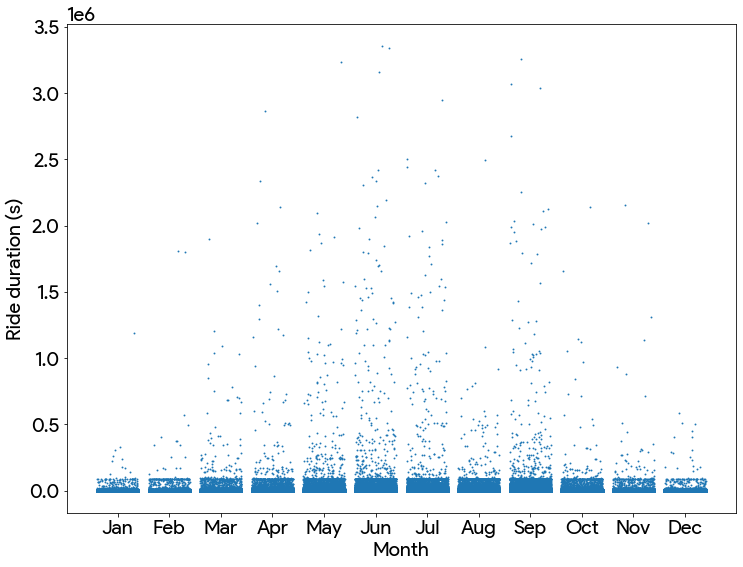

In [24]:
def add_jitter(row):
    jitter_val=np.random.uniform(-0.4,0.4)
    return row['month_num']+jitter_val
def scatter_by_month(in_col,in_df,ylabel_str,jitter=False, figname=None):
    if 'month_num' not in in_df.columns:
        in_df.loc[:,'month_num']=in_df.apply(get_month_num,axis=1)
    try:
        in_df.reset_index(inplace=True)
    except:
        pass
    in_df.sort_values(by=['month_num'],inplace=True)
    fig,ax=plt.subplots(figsize=(12,9))
    if jitter:
        in_df.loc[:,'jitter_month']=in_df.apply(add_jitter,axis=1)
        ax.scatter(in_df['jitter_month'],in_df[in_col],s=0.8,color='tab:blue')
    else:
        ax.scatter(in_df['month_num'],in_df[in_col],s=0.8,color='tab:blue')
    ax.set_xticks(in_df['month_num'].unique())
    ax.set_xticklabels(in_df['month'].unique())
    ax.set_xlabel('Month')
    ax.set_ylabel(ylabel_str)
    if figname:
        fig.savefig('figs/'+figname, dpi=1000, bbox_inches='tight')
    else:
        plt.show()
    

scatter_by_month(in_col='ride_duration',in_df=df,ylabel_str='Ride duration (s)',jitter=True)

now the `plot_by_month` is ready to use

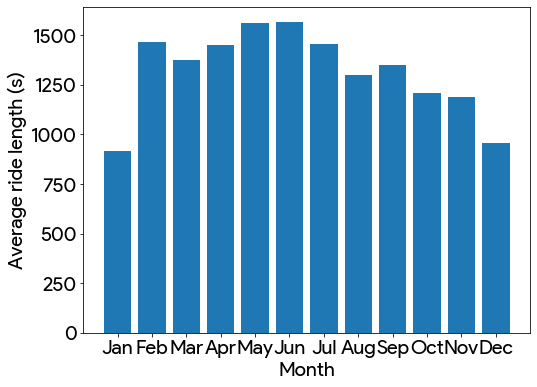

In [10]:
plot_by_month('ride_duration',ride_mean_df,
              'Average ride length (s)',figname='ride_mean_month')

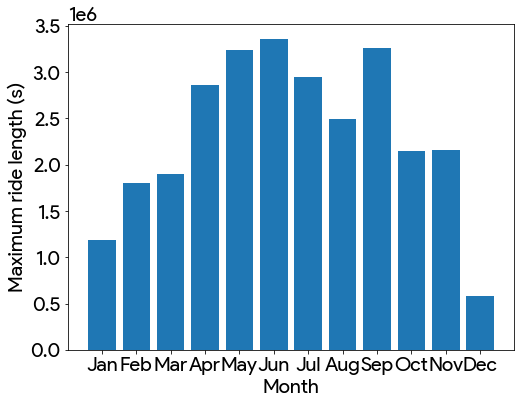

In [9]:
plot_by_month('ride_duration',ride_max_df,
              'Maximum ride length (s)',figname='ride_max_month')

calculating the mode of `day_of_week` for each month in the dataset

In [10]:
#calculate the mode of day of week
print(df.loc[:,['day_of_week','month']].groupby(['month'])['day_of_week'].agg(pd.Series.mode))

month
Apr    Fri
Aug    Sun
Dec    Wed
Feb    Sat
Jan    Sat
Jul    Sat
Jun    Sat
Mar    Sat
May    Sat
Nov    Sat
Oct    Sat
Sep    Sat
Name: day_of_week, dtype: object


calculating the `average_ride_length` for members vs. casual users of the service, grouped by month

In [11]:
#calculate the average ride_length for members vs. casual riders


print(df.loc[:,['ride_duration','month','member_casual']].groupby(['member_casual']).mean())
print(df.loc[:,['ride_duration','month','member_casual']].groupby(['member_casual','month']).mean())

               ride_duration
member_casual               
casual           1999.085630
member            858.107047
                     ride_duration
member_casual month               
casual        Apr      2281.379390
              Aug      1727.220815
              Dec      1610.976431
              Feb      2962.393742
              Jan      1541.075399
              Jul      1967.446008
              Jun      2227.304445
              Mar      2289.551147
              May      2293.857973
              Nov      1909.168181
              Oct      1815.311702
              Sep      1910.733953
member        Apr       881.352660
              Aug       846.093632
              Dec       764.961450
              Feb      1081.325087
              Jan       772.338703
              Jul       854.370402
              Jun       880.672914
              Mar       838.203126
              May       878.340997
              Nov       815.307857
              Oct       842.963214
         

plotting these turned out to be not as straight-forward as I expected. so, some 'wrangling' was required

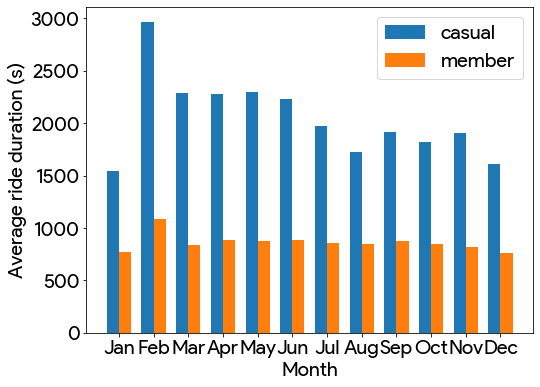

In [12]:
ride_mem_mon_df=df.loc[:,['ride_duration','month','member_casual']].groupby(['member_casual','month']).mean()
ride_mem_mon_df.reset_index(inplace=True)
ride_mem_mon_df.loc[:,'month_num']=ride_mem_mon_df.apply(get_month_num,axis=1)
ride_mem_mon_df.sort_values(by=['month_num'],inplace=True)
casual_y=ride_mem_mon_df['ride_duration'][ride_mem_mon_df['member_casual']=='casual']
member_y=ride_mem_mon_df['ride_duration'][ride_mem_mon_df['member_casual']=='member']
x=list(range(1,13))
labels=ride_mem_mon_df['month'][ride_mem_mon_df['member_casual']=='member']
fig,ax=plt.subplots(figsize=(8,6))
width=0.35
ax.bar([i-(width/2) for i in x],casual_y,width,label='casual',color='tab:blue')
ax.bar([i+(width/2) for i in x],member_y,width,label='member',color='tab:orange')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Average ride duration (s)')
ax.set_xlabel('Month')
#plt.show()
fig.savefig('figs/ride_mem_month', dpi=1000, bbox_inches='tight')

calculate average `ride_length` by day of week to see which day(s) of the week correspond to the longest (and shortest) ride lengths

In [13]:
#calculate the average ride_length by day_of_week
#calculate the number of rides for users by day_of_week by adding count of trip_id
print(df.loc[:,['ride_duration','month','day_of_week']].groupby(['day_of_week']).mean())
print(df.loc[:,['ride_duration','month','day_of_week']].groupby(['day_of_week','month']).mean())

             ride_duration
day_of_week               
Fri            1328.995374
Mon            1312.232812
Sat            1639.422024
Sun            1730.101161
Thu            1162.493949
Tue            1166.617892
Wed            1168.225628
                   ride_duration
day_of_week month               
Fri         Apr      1486.227972
            Aug      1250.701940
            Dec       890.235954
            Feb      1540.214462
            Jan       856.319641
...                          ...
Wed         Mar      1041.507563
            May      1208.726240
            Nov       965.024286
            Oct      1068.983811
            Sep      1146.135277

[84 rows x 1 columns]


again, some 'wrangling' was required to get the days of the week to show up in chronological order on the plot

  day_of_week  ride_duration  dow_num
1         Mon    1312.232812        1
5         Tue    1166.617892        2
6         Wed    1168.225628        3
4         Thu    1162.493949        4
0         Fri    1328.995374        5
2         Sat    1639.422024        6
3         Sun    1730.101161        7


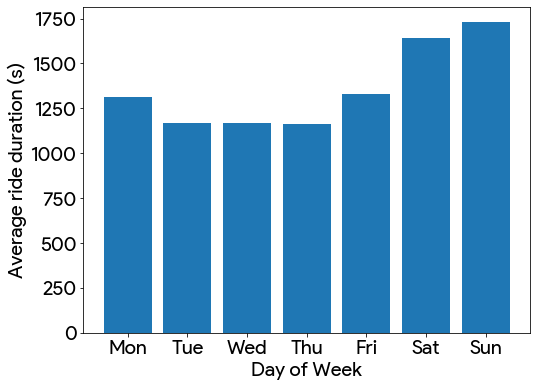

In [14]:
def get_month_num(row):
    month_dt=dt.strptime(row['month'],'%b')
    return month_dt.month

days={0:'Mon',1:'Tue',2:'Wed',
     3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dow_nums={'Mon':1, 'Tue':2, 'Wed':3,
         'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7}
def get_dow_num(row):
    return dow_nums[row['day_of_week']]


ride_day_df=df.loc[:,['ride_duration','month','day_of_week']].groupby(['day_of_week']).mean()
ride_day_df.reset_index(inplace=True)
ride_day_df.loc[:,'dow_num']=ride_day_df.apply(get_dow_num,axis=1)
ride_day_df.sort_values(by=['dow_num'],inplace=True)
print(ride_day_df)
fig,ax=plt.subplots(figsize=(8,6))
ax.bar(ride_day_df['dow_num'],ride_day_df['ride_duration'])
ax.set_xticks(ride_day_df['dow_num'])
ax.set_xticklabels(ride_day_df['day_of_week'])
ax.set_ylabel('Average ride duration (s)')
ax.set_xlabel('Day of Week')
fig.savefig('figs/ride_day', dpi=1000, bbox_inches='tight')
#plt.show()

In [21]:
#calculate the number of rides for users by day_of_week by adding count of trip_id
df.loc[:,'ride_id'].value_counts()

6FA7E6905E98728A    2
789640C9FEF98525    2
274C073E4F96B726    2
8F46132F5095A1C4    2
D6F0C7555EB098DB    2
                   ..
5EB69D7A429E525C    1
36D192A351655F41    1
812F66F9E33F07D1    1
203A10DE8856A3C7    1
343190A2DC023FED    1
Name: ride_id, Length: 5669010, dtype: int64